In [21]:
import geopandas as gpd
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
walesLsoa = gpd.read_file('jupyter\\geojsons-master\\wales_lsoa.geojson')



<AxesSubplot:>

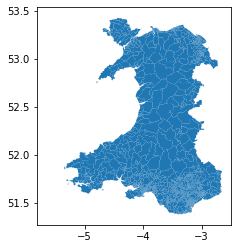

In [3]:
walesLsoa.plot()

In [4]:
walesLsoa = walesLsoa.rename(columns = {'LSOA11CD':'LSOA code'})


In [5]:
len(walesLsoa)

1909

In [6]:
df = pd.read_csv('schoolsDeri.csv')

In [7]:
newdf = walesLsoa.merge(df, on='LSOA code')

In [8]:
type(newdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

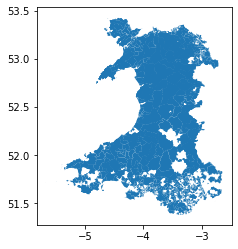

In [9]:
newdf.plot()

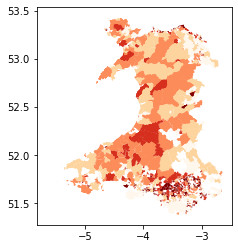

In [10]:
newdf.plot(column='Index of Multiple Deprivation 2019 score - Wales base', cmap='OrRd', scheme='quantiles');


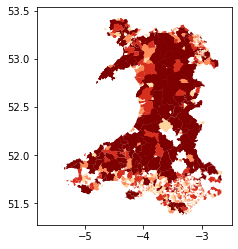

In [11]:
newdf.plot(column='Percentage of connections receiving less than 10Mbit/s broadband', cmap='OrRd', scheme='quantiles');
#these might be the areas that need support with bad connection speeds

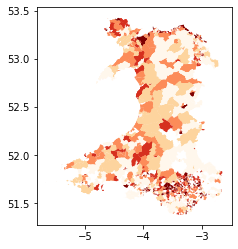

In [12]:
newdf.plot(column='Unemployment rate', cmap='OrRd', scheme='quantiles');
#these might be the areas that need support with affordability

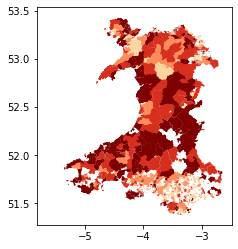

In [13]:

newdf.plot(column='Percentage of population aged 65 and over', cmap='OrRd', scheme='quantiles');
#these might be the areas that need support with affordability

In [14]:
#need to add the crowded and rural area
#need to add the mobile data from ookla

In [15]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

C:\Users\David\.conda\envs\geo_env\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\David\.conda\envs\geo_env\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


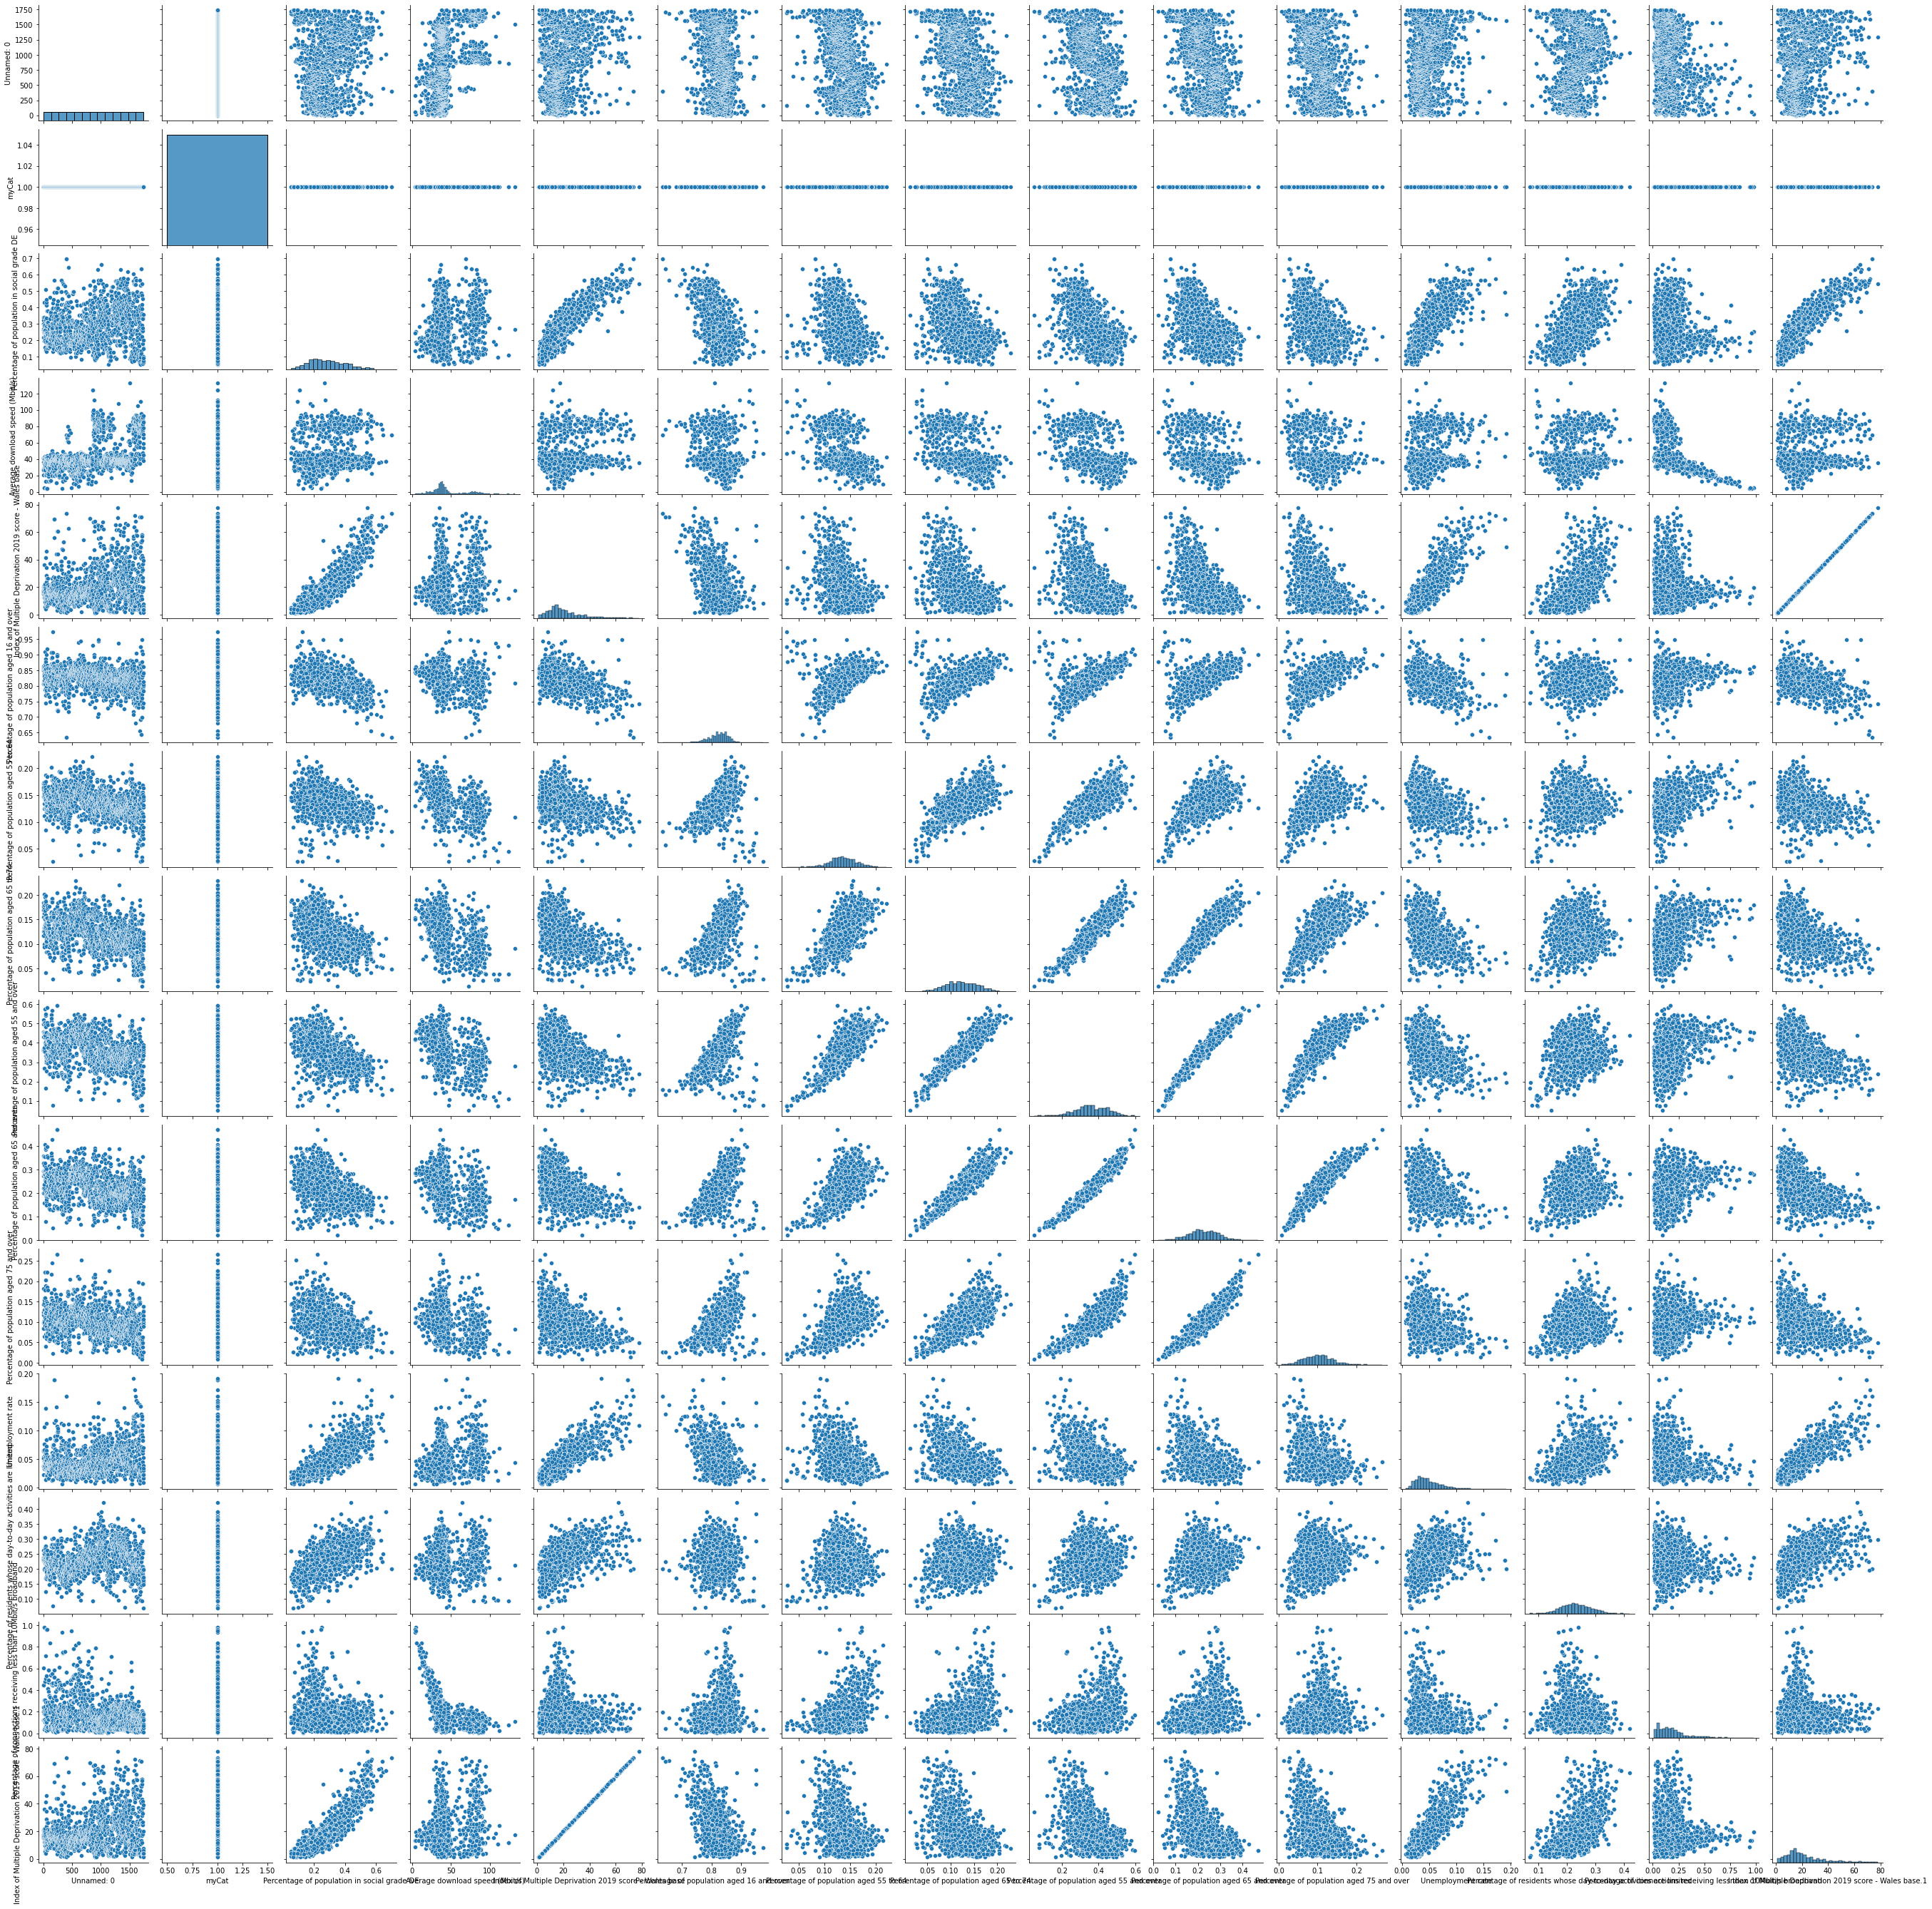

In [19]:
sns.pairplot(df)

In [28]:
x = df['Percentage of population in social grade DE'].values
X = x.reshape(-1, 1)
y = df['Unemployment rate'].values
regr = LinearRegression(
   fit_intercept = True, copy_X = True
).fit(X,y)


LinearRegression()

In [41]:
regr.predict([[0.9]])

array([0.15684839])